# CATS-vs-DOGS CNN KERAS.

# [Please star/upvote if u like it.]

#### Note::->

This notebook was run on Google Colab and some part of this thus contains code specific to the authorisation, other functionalities on the Google colab.

Thus you may skip that part while reading the notebook and may focus onto the modelling specific part.

## CONTENTS::

#### 1 ) Importing Various Modules

#### 2 ) Prepare the Data

#### 3 ) Modelling

#### 4 )  Evaluating the Model Performance

#### 5) Making Predictions on the Test Set

#### 6) Saving Submissions onto a CSV

## 1 ) Importing Various Modules

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np         
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [4]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         542       11274         248        1205       12013
Swap:             0           0           0


## 2 ) Prepare the Data

## 2.1) Making the functions to get the training ,testing and validation set from the Images

In [0]:
TRAIN_DIR='drive/Colab Notebooks/cats-vs-dogs/train.zip'
TEST_DIR='drive/Colab Notebooks/cats-vs-dogs/test.zip'

In [0]:
X=[]
Y=[]

In [0]:
def assign_label(image_file_name):
    animal=image_file_name.split('.')[0]
    if (animal==str('train/cat') or animal==str('test/cat')):
        return [1,0]
    else:
        return [0,1]
    

The above function returns a one hot encoded array depending on whether the image is of a Dog or a Cat. 

The train/ or test/ is just to incorporate both the training and test set in one function.

In [0]:
def image_to_pixels(file,width):
    image=Image.open(file)
    image = image.resize((width,width))  
    arr=np.array(image)
    return arr

The above function converts an image to pixel values. All it needs is the image and the size to which you want to resize it into. For this I have used the PIL (Python Image Library).

In [0]:
def prepare_train_data():
  
  zip_file_path=TRAIN_DIR      
#   print(zip_file_path)
  
    with ZipFile(zip_file_path) as archive:
#   print(archive)    
  
      list_img_file_names=archive.namelist()[1:]   # excluding the first empty one.
#   print(list_img_file_names)
#   print(list_img_file_names[3])

      img_zipinfo_objs=archive.infolist()[1:]
#   print((img_zipinfo_objs))
#   print((img_zipinfo_objs[1]))
  
      for i in range(len(img_zipinfo_objs)):
        with archive.open(img_zipinfo_objs[i]) as file:
#             print((file))
            X.append(image_to_pixels(file,100))
            Y.append(assign_label(list_img_file_names[i]))


In the above function I have used the python ZipFile module to convert the compressed zip images into pixel values and then store these pixel values in the form of a numpy array. In this way the pixel values of the training+validation data are done.

In [0]:
# making the (train + val) set.

prepare_train_data()
X=np.array(X)
Y=np.array(Y)
print(X.shape)
print(Y.shape)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
def prepare_test_data():
  
  zip_file_path=TEST_DIR      
#   print(zip_file_path)
  
    with ZipFile(zip_file_path) as archive:
#   print(archive)    
  
     list_img_file_names=archive.namelist()[1:]   # excluding the first empty one.
#   print(list_img_file_names)
#   print(list_img_file_names[3])

     img_zipinfo_objs=archive.infolist()[1:]
#   print((img_zipinfo_objs))
#   print((img_zipinfo_objs[1]))
  
     for i in range(len(img_zipinfo_objs)):
        with archive.open(img_zipinfo_objs[i]) as file:
#             print((file))
            test.append(image_to_pixels(file,100))
             


This function is similar to the previous function and creates the test set from the test.zip file by again using the python ZipFile module.

In [0]:
making the (test) set.

test=[]
prepare_test_data()
test=np.array(test)
print(test.shape)

In [ ]:
del X
del Y

## 2.2 ) Saving data for future reference.

I have saved the numpy arrays in order to avoid the same computing again and again and later used them by loading them.

In [0]:
#saving the numpy arrays for future use.

np.save('./drive/Colab Notebooks/cats-vs-dogs/x_train.npy',x_train)
np.save('./drive/Colab Notebooks/cats-vs-dogs/x_test.npy',x_test)

np.save('./drive/Colab Notebooks/cats-vs-dogs/y_train.npy',y_train)
np.save('./drive/Colab Notebooks/cats-vs-dogs/y_test.npy',y_test)

np.save('./drive/Colab Notebooks/cats-vs-dogs/test.npy',test)

In [15]:
 del x_train,y_train,x_test,y_test,test
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         541       11272         248        1208       12013
Swap:             0           0           0


In [0]:
#loading the numpy arrays from the drive storage.

x_train=np.load('drive/Colab Notebooks/cats-vs-dogs/x_train.npy')
x_test=np.load('drive/Colab Notebooks/cats-vs-dogs/x_test.npy')

y_train=np.load('drive/Colab Notebooks/cats-vs-dogs/y_train.npy')
y_test=np.load('drive/Colab Notebooks/cats-vs-dogs/y_test.npy')

test=np.load('drive/Colab Notebooks/cats-vs-dogs/test.npy')

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train.nbytes)
print(x_test.nbytes)
print(y_train.nbytes)
print(y_test.nbytes)



(20000, 100, 100, 3)
(5000, 100, 100, 3)
(20000, 2)
(5000, 2)
600000000
150000000
320000
80000


## 2.3 ) Visualizing some Random Images

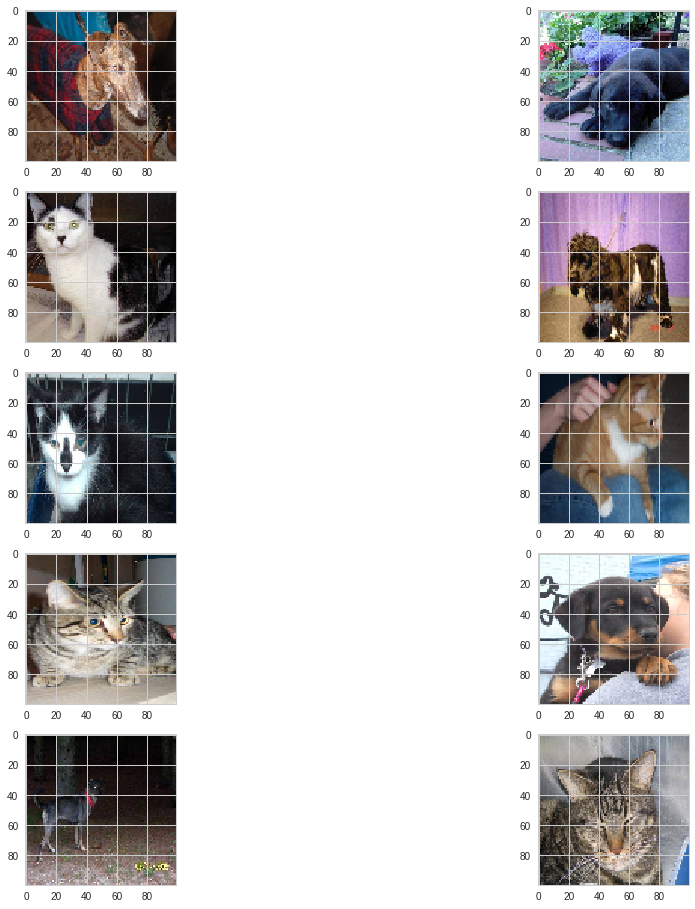

In [58]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(x_train[count])
        count+=1

## 2.4 ) Setting the Random seeds

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [0]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))
 

In [0]:
batch_size=128
epochs=20

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.1)

## 3.2 ) Data Augmentation to prevent Overfitting

In [0]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.1,
    rotation_range=10,
    horizontal_flip=True)
datagen.fit(x_train)


## 3.3 ) Compiling the Keras Model

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

## 3.4 ) Summary of the Model

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 96)        55392     
__________

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[red_lr])

Epoch 1/20
156/156 [==============================] - 71s 457ms/step - loss: 0.7158 - acc: 0.5142 - val_loss: 4.3390 - val_acc: 0.5562

Epoch 2/20
156/156 [==============================] - 68s 435ms/step - loss: 0.6966 - acc: 0.5675 - val_loss: 5.3662 - val_acc: 0.6013

Epoch 3/20
156/156 [==============================] - 69s 440ms/step - loss: 0.6500 - acc: 0.6304 - val_loss: 4.5947 - val_acc: 0.6135

Epoch 4/20
156/156 [==============================] - 68s 434ms/step - loss: 0.6040 - acc: 0.6792 - val_loss: 4.4137 - val_acc: 0.6798

Epoch 5/20
156/156 [==============================] - 67s 432ms/step - loss: 0.5416 - acc: 0.7272 - val_loss: 4.0652 - val_acc: 0.7072

Epoch 6/20
156/156 [==============================] - 67s 432ms/step - loss: 0.4856 - acc: 0.7653 - val_loss: 3.5012 - val_acc: 0.7645

Epoch 7/20
156/156 [==============================] - 66s 426ms/step - loss: 0.4402 - acc: 0.7936 - val_loss: 3.2248 - val_acc: 0.7886

Epoch 8/20
156/156 [==============================] - 68s 433ms/step - loss: 0.4004 - acc: 0.8243 - val_loss: 3.0366 - val_acc: 0.8023

Epoch 9/20
156/156 [==============================] - 67s 429ms/step - loss: 0.3618 - acc: 0.8375 - val_loss: 3.0647 - val_acc: 0.7963

Epoch 10/20
156/156 [==============================] - 67s 431ms/step - loss: 0.3379 - acc: 0.8505 - val_loss: 2.8127 - val_acc: 0.8141

Epoch 11/20
156/156 [==============================] - 67s 429ms/step - loss: 0.3136 - acc: 0.8625 - val_loss: 2.6696 - val_acc: 0.8189

Epoch 12/20
156/156 [==============================] - 68s 433ms/step - loss: 0.2948 - acc: 0.8711 - val_loss: 2.5704 - val_acc: 0.8289

Epoch 13/20
156/156 [==============================] - 67s 428ms/step - loss: 0.2787 - acc: 0.8822 - val_loss: 2.5486 - val_acc: 0.8277

Epoch 14/20
156/156 [==============================] - 66s 424ms/step - loss: 0.2591 - acc: 0.8909 - val_loss: 2.1393 - val_acc: 0.8566

Epoch 15/20
156/156 [==============================] - 66s 423ms/step - loss: 0.2486 - acc: 0.8952 - val_loss: 2.1702 - val_acc: 0.8595

Epoch 16/20
156/156 [==============================] - 66s 422ms/step - loss: 0.2372 - acc: 0.9011 - val_loss: 2.3896 - val_acc: 0.8383

Epoch 17/20
156/156 [==============================] - 66s 425ms/step - loss: 0.2227 - acc: 0.9063 - val_loss: 2.1202 - val_acc: 0.8613

Epoch 18/20
156/156 [==============================] - 66s 425ms/step - loss: 0.2126 - acc: 0.9106 - val_loss: 2.8431 - val_acc: 0.8103

Epoch 19/20
156/156 [==============================] - 65s 419ms/step - loss: 0.2181 - acc: 0.9105 - val_loss: 2.0864 - val_acc: 0.8618

Epoch 20/20
156/156 [==============================] - 65s 418ms/step - loss: 0.1967 - acc: 0.9181 - val_loss: 1.9159 - val_acc: 0.8741

####  Note that the final validation accuracy is close to 88 % which is quite decent.                                                                                   


## 4 ) Evaluating the Model Performance

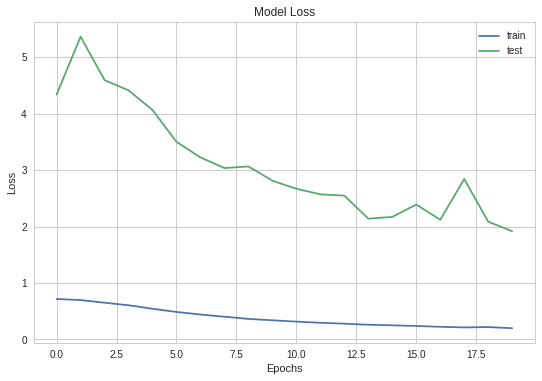

In [32]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

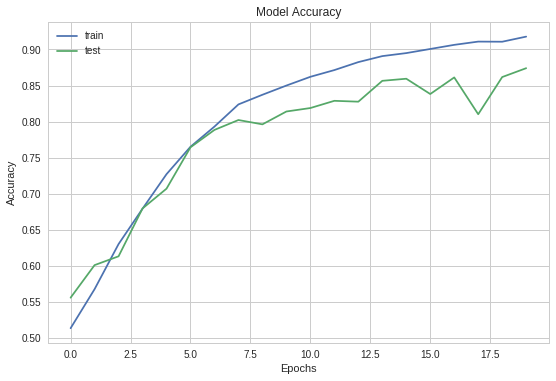

In [31]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## 5 ) Making predictions on the Test Set

In [0]:
pred=model.predict(test)
# print(pred)

## 6 ) Saving Submissions onto a CSV

In [0]:
imageid=[]
pred_prob=[]
for i in range(len(test)):
    imageid.append(i+1)
    pred_prob.append(pred[i,1])
   
 d={'id':imageid,'label':pred_prob}
ans=pd.DataFrame(d)
ans.to_csv('predictions.csv',index=False)

In [0]:
from google.colab import files
files.download('predictions.csv')

## THE END.

## [Please star/upvote if u like it.]